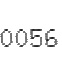

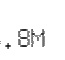

4
captured text depth = 0056.8M



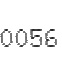

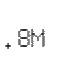

1
captured text depth = 0056.


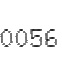

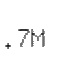

4
captured text depth = 056.iM



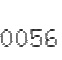

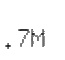

4
captured text depth = 056.fh



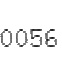

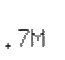

4
captured text depth = 0056.7h



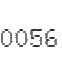

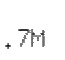

1
captured text depth = 0056.


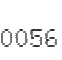

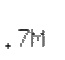

1
captured text depth = 0056.


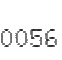

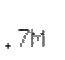

1
captured text depth = 0056.


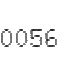

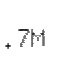

4
captured text depth = 0056.fh



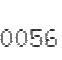

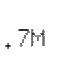

4
captured text depth = 0056.fh



In [99]:
# This script aims to grab frames from video ROV video footage and create jpegs with exif information added


# import required packages
import cv2
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import Image
from platform import python_version
import io
import piexif

import pytesseract
# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract'

import math
import csv
import numpy as np
from csv import DictWriter
import re

# Read the video from specified path this could clearly be changed to a file open box
cap = cv2.VideoCapture('/Users/sa01mt/Dropbox/TRITONIA/SAMPLE_ROV_FOOTAGE/FUWL_FISH_SURVEY_180307_194840_515.asf')  
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
 

# Loop through specified frames currently I like being able to specify specific start and end points as well as image grab frequency
#but this could definitelu to be changed to be realitve to the timing of the footage and frame rate of footage to make more user friendly
for i in range(2500, 2510, 1):
    
    # choose specified frame
    cap.set(cv2.CAP_PROP_POS_FRAMES,i)
    # read specified frame
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # test for focus and reject if image is blurry 
    #taken from https://www.analyticsvidhya.com/blog/2020/09/how-to-perform-blur-detection-using-opencv-in-python/
    # First crop banner text from image as otherwise this can be included in the blurr detection process and make the image appear in focus. These banners will need to be removed for agisoft proccesing anyhow
    #set pixel value of top of cropped image
    vert_crop_start = 80
    #set pixel value of bottom of cropped image
    vert_crop_end = frame.shape[0]-160
    # Crop frame
    # crop_frame = frame[vert_crop_start:vert_crop_end, 1:frame.shape[1]]
    # plt.imshow(frame)
    # plt.title('Orignal')
    # plt.show()
    # plt.imshow(crop_frame)
    # plt.title('Cropped')
    # plt.show()

    #apply laplace filter  and compute the variance
    fm = cv2.Laplacian(frame,cv2.CV_64F).var()
    # define the blurr detection threshold 
    blurr_threshold=0

    if fm > blurr_threshold:
        
        ## add value of variance of laplacian filter to frame
        # cv2.putText(crop_frame, "{}: {:.2f}".format('Laplacian Filter Variance',fm), (10, 30),
        #     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)       
        ## write specified frame to jpg image
        cv2.imwrite('images/Test_Frame'+str(i)+'.jpg',crop_frame)
        
        #display image for testing purposes
        # display(Image.open('images/Test_Frame'+str(i)+'.jpg'))

        ## read banner text using OCR 
        
        text_frame_E =  frame[1:30, 1:math.floor(frame.shape[1]/2)]
        # write jpeg for testing    
    #     cv2.imwrite('images/text_frame_E'+str(i)+'.jpg',text_frame_E)
    #    #display image for testing purposes
    #     display(Image.open('images/text_frame_E'+str(i)+'.jpg'))
        # convert to greayscale 
        # remove backround values
        # # create the histogram
        # histogram, bin_edges = np.histogram(text_frame_E, bins=256, range=(0, 256))
        # # # configure and draw the histogram figure
        # plt.figure()
        # plt.title("Grayscale Histogram")
        # plt.xlabel("grayscale value")
        # plt.ylabel("pixels")
        # plt.xlim([0.0, 256])  # <- named arguments do not work here
        # plt.plot(bin_edges[0:-1], histogram)  # <- or here
        # plt.show()
        # create mask with indices of values that are greater than a ceratin threshold that will subsequently be removed
        text_backround_threshold = 200
        mask_E = text_frame_E > text_backround_threshold
        # create new image matrix same size as orignal image but filled with zeros
        sel_E = np.zeros_like(text_frame_E)
        # populate new matirx with pixel intensity values above the threshold    
        sel_E[mask_E] = text_frame_E[mask_E]
        # invert image for better text detection
        text_sel_E=~sel_E    
        # write jpeg for testing    
        #cv2.imwrite('images/East_Frame'+str(i)+'.jpg',text_sel_E)
        #display image for testing purposes
        #display(Image.open('images/East_Frame'+str(i)+'.jpg'))
        text_E = pytesseract.image_to_string(text_sel_E)
        # print('captured text E = ' + text_E)
        # deal with the text string and convert to numeric position. In this case we split the text each side  of the decimal place and then select only the numeric characters, then re combine.
        text_E_int = text_E.split(".")[0]
        text_E_int = re.findall("\d+", text_E_int)[0]
        text_E_dec = text_E.split(".")[1]
        text_E_dec = re.findall("\d+", text_E_dec)[0]
        east_pos = text_E_int + '.' + text_E_dec 
        # print(str(east_pos))

        text_frame_N =  frame[1:30, math.floor(frame.shape[1]/2):frame.shape[1]]
        # create mask with indices of values that are greater than a ceratin threshold that will subsequently be removed
        mask_N = text_frame_N > text_backround_threshold
        # create new image matrix same size as orignal image but filled with zeros
        sel_N = np.zeros_like(text_frame_N)
        # populate new matirx with pixel intensity values above the threshold    
        sel_N[mask_N] = text_frame_N[mask_N]
        text_sel_N=~sel_N
        text_N = pytesseract.image_to_string(text_sel_N)
        # print('captured text  text_frame_depth_inttext_frame_depth_inttext_frame_depth_inttext_frame_depth_inttext_frame_depth_inttext_frame_depth_int = ' + text_N)
        # deal with the text string and convert to numeric position. In this case we split the text each side  of the decimal place and then select only the numeric characters, then re combine.
        text_N_int = text_N.split(".")[0]
        text_N_int = re.findall("\d+", text_N_int)[0]
        text_N_dec = text_N.split(".")[1]
        text_N_dec = re.findall("\d+", text_N_dec)[0]
        north_pos = text_N_int + '.' + text_N_dec 
        # print(str(north_pos))

        # # create rectangle for testing
        # frame_depth_test=frame
        # cv2.rectangle(frame_depth_test, (570 ,475), (710,500), (265,0,0), 5)
        # # write jpeg for testing    
        # cv2.imwrite('images/Depth_Frame'+str(i)+'.jpg',frame_depth_test)
        # # display image for testing purposes
        # display(Image.open('images/Depth_Frame'+str(i)+'.jpg'))
        
        text_frame_depth_int = frame[450:510,598:660]
        # create mask with indices of values that are greater than a ceratin threshold that will subsequently be removed
        mask_depth_int = text_frame_depth_int > 100
        # create new image matrix same size as orignal image but filled with zeros
        sel_depth_int = np.zeros_like(text_frame_depth_int)
        # populate new matirx with pixel intensity values above the threshold    
        sel_depth_int[mask_depth_int] = text_frame_depth_int[mask_depth_int]
        text_sel_depth_int=~sel_depth_int
        # # write jpeg for testing    
        cv2.imwrite('images/Depth_int_Frame'+str(i)+'.jpg',text_sel_depth_int)
        #display image for testing purposes
        display(Image.open('images/Depth_int_Frame'+str(i)+'.jpg'))
        # read text
        text_depth_int = pytesseract.image_to_string(text_sel_depth_int)
        # deal with the text string and convert to numeric position. 
        text_depth_int = re.findall("\d+", text_depth_int)[0]

        text_frame_depth_dec = frame[450:510,655:730]
        # create mask with indices of values that are greater than a ceratin threshold that will subsequently be removed
        mask_depth_dec = text_frame_depth_dec > 100
        # create new image matrix same size as orignal image but filled with zeros
        sel_depth_dec = np.zeros_like(text_frame_depth_dec)
        # populate new matirx with pixel intensity values above the threshold    
        sel_depth_dec[mask_depth_dec] = text_frame_depth_dec[mask_depth_dec]
        text_sel_depth_dec=~sel_depth_dec
        # # write jpeg for testing    
        cv2.imwrite('images/Depth_dec_Frame'+str(i)+'.jpg',text_sel_depth_dec)
        #display image for testing purposes
        display(Image.open('images/Depth_dec_Frame'+str(i)+'.jpg'))
        # read text
        text_depth_dec = pytesseract.image_to_string(text_sel_depth_dec)
        print(len(text_depth_dec))
        # deal with the text string and convert to numeric position. 
        # text_depth_dec = re.findall("\d+", text_depth_dec)[0]


        print('captured text depth = ' + text_depth_int + "." + text_depth_dec)
        

       


        # write position values in CSV file
        # write the header
        headers = ['East Position', 'North Position']
        position_data_dict = {'East Position' :east_pos,'North Position' : north_pos}
        # create CSV file for recording banner data
        with open('banner_information.csv', mode='a')  as f_csv:
            dictwriter_object = DictWriter(f_csv, fieldnames=headers)
            dictwriter_object.writerow(position_data_dict)
            # Close the file object
            f_csv.close()
        
       
# close video file
cap.release()
cv2.destroyAllWindows()


In [4]:
 # add exif information currenlty listed are the fields that agisoft metashape is expecting

      
# Size(pix)
# Date and time
# Camera make
# Camera model
# Focal length
# F-stop
# Shutter speed
# 35mm focal equivalent
# Sensor x res
# Sensor Y res
# Orientation




# opens an file buffer
o = io.BytesIO()
# load image
thumb_im = Image.open('test2'+str(i)+'.jpg')
#create smaller resolution thumbnail
#thumb_im.thumbnail((50, 50), Image.ANTIALIAS)
# save this thumnail
#thumb_im.save(o, "jpeg")
# read in raw byte informatiom
#thumbnail = o.getvalue()

# create exif information tags
zeroth_ifd = {piexif.ImageIFD.Make: u"Canon",
              piexif.ImageIFD.XResolution: (96, 1),
              piexif.ImageIFD.YResolution: (96, 1),
              piexif.ImageIFD.Software: u"piexif"
              }
exif_ifd = {piexif.ExifIFD.DateTimeOriginal: u"2099:09:29 10:10:10",
            piexif.ExifIFD.LensMake: u"LensMake",
            piexif.ExifIFD.Sharpness: 65535,
            piexif.ExifIFD.LensSpecification: ((1, 1), (1, 1), (1, 1), (1, 1)),
            }
gps_ifd = {piexif.GPSIFD.GPSVersionID: (2, 0, 0, 0),
           piexif.GPSIFD.GPSAltitudeRef: 1,
           piexif.GPSIFD.GPSDateStamp: u"1999:99:99 99:99:99",
           }
first_ifd = {piexif.ImageIFD.Make: u"Canon",
             piexif.ImageIFD.XResolution: (40, 1),
             piexif.ImageIFD.YResolution: (40, 1),
             piexif.ImageIFD.Software: u"piexif"
             }
# create dictionary relating each of the exif entires with thier names 
exif_dict = {"0th":zeroth_ifd, "Exif":exif_ifd, "GPS":gps_ifd, "1st":first_ifd, "thumb_im":thumb_im}
exif_bytes = piexif.dump(exif_dict)


im = Image.open('test2'+str(i)+'.jpg')
#im.thumbnail((100, 100), Image.ANTIALIAS)
im.save("out.jpg", exif=exif_bytes)

FileNotFoundError: [Errno 2] No such file or directory: 'test214000.jpg'

In [ ]:
# example of how to increase image contrast taken from  https://discuss.bluerobotics.com/t/action-packed-weekend-at-lake-coeur-d-alene/10236/4


# def process(frame):
#     result = np.empty_like(frame)
#     # normalise each colour channel
#     for channel in range(3):
#         result[:,:,channel] = cv2.normalize(frame[:,:,channel], None, 0, 255, cv2.NORM_MINMAX)
#     # clip off the bottom 10% of values to increase contrast
#     return cv2.convertScaleAbs(result, None, 1.1, -25)

In [13]:
#  # strip text from image
    




# # Read image from which text needs to be extracted
img = cv2.imread('test2'+str(i)+'.jpg')

# # Preprocessing the image starts

# # Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# # Specify structure shape and kernel size.
# # Kernel size increases or decreases the area
# # of the rectangle to be detected.
# # A smaller value like (10, 10) will detect
# # each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# # Appplying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# # Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
 												cv2.CHAIN_APPROX_NONE)

# # Creating a copy of image
im2 = img.copy()

# # A text file is created and flushed

file = open ("recognized.txt", "w+")
file.write("")
file.close()
file = open("recognized.txt", "a")
text = pytesseract.image_to_string(im2)
file.write(text)
file.write("\n")
file.close


# # # Looping through the identified contours
# # # Then rectangular part is cropped and passed on
# # # to pytesseract for extracting text from it
# # # Extracted text is then written into the text file
# for cnt in contours: 
#  	x, y, w, h = cv2.boundingRect(cnt)
	
# # 	# Drawing a rectangle on copied image
#  	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
# # 	# Cropping the text block for giving input to OCR
#  	cropped = im2[y:y + h, x:x + w]
# 	plt.imshow(cropped)
# 	plt.title('Cropped')
# 	plt.show() 
# # 	# Open the file in append mode
#  	file = open("recognized.txt", "a")
	
# # 	# Apply OCR on the cropped image
#  	text = pytesseract.image_to_string(cropped)
	
# # 	# Appending the text into file
#  	file.write(text)
#  	file.write("\n")
	
# # 	# Close the file
#  	file.close


<function TextIOWrapper.close()>